[0]	eval-error:0.06869	train-error:0.06890
[1]	eval-error:0.04628	train-error:0.04690
[2]	eval-error:0.02286	train-error:0.02385
[3]	eval-error:0.01794	train-error:0.01812
[4]	eval-error:0.01291	train-error:0.01309
[5]	eval-error:0.00867	train-error:0.00908
[6]	eval-error:0.00652	train-error:0.00665
[7]	eval-error:0.00430	train-error:0.00443
[8]	eval-error:0.00364	train-error:0.00356
[9]	eval-error:0.00374	train-error:0.00331
[10]	eval-error:0.00311	train-error:0.00277
[11]	eval-error:0.00237	train-error:0.00227
[12]	eval-error:0.00321	train-error:0.00323
[13]	eval-error:0.00235	train-error:0.00216
[14]	eval-error:0.00187	train-error:0.00168
[15]	eval-error:0.00152	train-error:0.00145
[16]	eval-error:0.00164	train-error:0.00141
[17]	eval-error:0.00157	train-error:0.00138
[18]	eval-error:0.00129	train-error:0.00112
[19]	eval-error:0.00124	train-error:0.00112
[20]	eval-error:0.00121	train-error:0.00098
[21]	eval-error:0.00096	train-error:0.00089
[22]	eval-error:0.00109	train-error:0.0009

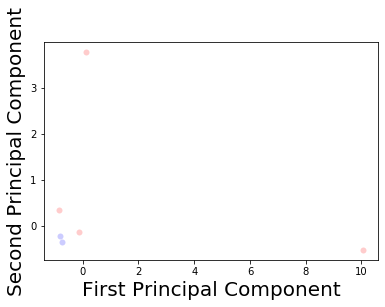

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import time
from test_xgboost import perf_parse
from sklearn.decomposition import PCA

def plot_wrong_samples():

    wrong_sample = x_test[y_test != predictions]
    wrong_pred = xgb_model.predict(wrong_sample)
    print(wrong_pred)
    wrong_sample_pca = pca.transform(wrong_sample)
    plt.figure()
    colors = ['b', 'r', 'orange']
    Label_Com = ['positive', 'negative']
    for index in range(2):
        x_1 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 0]
        x_2 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 1]

        plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)
    plt.xlabel("First Principal Component", fontsize=20)
    plt.ylabel("Second Principal Component", fontsize=20)

    #plt.savefig("PCA.png")
    plt.show()

def xgb_train(seed = 1):

    dataset = np.load('satellite_state.npy')
    X = dataset[:, :-1]
    y = dataset[-1]
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[:, :-1], dataset[:, -1], random_state=seed)
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    pca = PCA(n_components=2, whiten=True)
    pca.fit(x_train)

    since = time.time()
    num_round = 100

    param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
    xgb_model = xgb.train(param, dtrain, num_round, evallist)
    #xgb_model.fit(x_train, y_train)

    #xgb.plot_tree(xgb_model, num_trees=0)
    #plt.show()

    time_elapsed = time.time() - since
    print('Training complete in {:.2f}s'.format(time_elapsed))
    predictions = xgb_model.predict(dtest)
    predictions = np.array(predictions > 0.5)

    cm_perf = (confusion_matrix(y_test, predictions))
    print("Confusion matrix: \n", cm_perf)
    perf = perf_parse(cm_perf)
    
    wrong_sample = x_test[y_test != predictions]
    
    print("The wrong sample Index: ", end='')
    for ele in wrong_sample:
        for i, x in enumerate(X):
            if np.sum(x - ele) == 0:
                print(i, end=' ')
    
    wrong_pred = xgb_model.predict(xgb.DMatrix(wrong_sample))
    print("Wrong prediction",wrong_pred)
    wrong_sample_pca = pca.transform(wrong_sample)
    print(wrong_sample_pca)
    colors = ['b', 'r', 'orange']
    Label_Com = ['positive', 'negative']
    plt.figure()
    for index in range(2):
        x_1 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 0]
        x_2 = wrong_sample_pca[y_test[y_test != predictions] == index][:, 1]

        plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)
    plt.xlabel("First Principal Component", fontsize=20)
    plt.ylabel("Second Principal Component", fontsize=20)
    plt.show()


    return xgb_model

xgb_1 = xgb_train(1)
# xgb_model.save_model('xgb.model')

[0]	eval-error:0.06995	train-error:0.06848
[1]	eval-error:0.04744	train-error:0.04651
[2]	eval-error:0.02296	train-error:0.02381
[3]	eval-error:0.01753	train-error:0.01826
[4]	eval-error:0.01086	train-error:0.01069
[5]	eval-error:0.01048	train-error:0.01075
[6]	eval-error:0.00773	train-error:0.00710
[7]	eval-error:0.00397	train-error:0.00436
[8]	eval-error:0.00376	train-error:0.00413
[9]	eval-error:0.00285	train-error:0.00328
[10]	eval-error:0.00227	train-error:0.00303
[11]	eval-error:0.00207	train-error:0.00227
[12]	eval-error:0.00217	train-error:0.00237
[13]	eval-error:0.00189	train-error:0.00223
[14]	eval-error:0.00212	train-error:0.00225
[15]	eval-error:0.00184	train-error:0.00197
[16]	eval-error:0.00121	train-error:0.00148
[17]	eval-error:0.00086	train-error:0.00105
[18]	eval-error:0.00134	train-error:0.00156
[19]	eval-error:0.00086	train-error:0.00104
[20]	eval-error:0.00083	train-error:0.00078
[21]	eval-error:0.00078	train-error:0.00064
[22]	eval-error:0.00071	train-error:0.0006

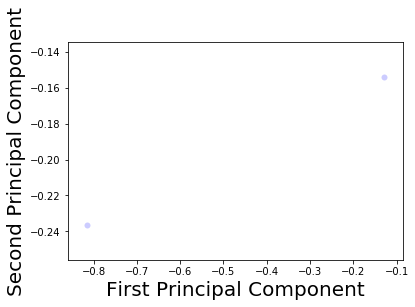

[0]	eval-error:0.07031	train-error:0.06836
[1]	eval-error:0.04818	train-error:0.04627
[2]	eval-error:0.02344	train-error:0.02365
[3]	eval-error:0.01862	train-error:0.01795
[4]	eval-error:0.01109	train-error:0.01056
[5]	eval-error:0.01028	train-error:0.00986
[6]	eval-error:0.00626	train-error:0.00587
[7]	eval-error:0.00457	train-error:0.00443
[8]	eval-error:0.00442	train-error:0.00432
[9]	eval-error:0.00338	train-error:0.00327
[10]	eval-error:0.00303	train-error:0.00317
[11]	eval-error:0.00194	train-error:0.00210
[12]	eval-error:0.00215	train-error:0.00216
[13]	eval-error:0.00227	train-error:0.00217
[14]	eval-error:0.00210	train-error:0.00197
[15]	eval-error:0.00187	train-error:0.00184
[16]	eval-error:0.00235	train-error:0.00225
[17]	eval-error:0.00154	train-error:0.00155
[18]	eval-error:0.00124	train-error:0.00121
[19]	eval-error:0.00126	train-error:0.00110
[20]	eval-error:0.00114	train-error:0.00104
[21]	eval-error:0.00083	train-error:0.00071
[22]	eval-error:0.00076	train-error:0.0006

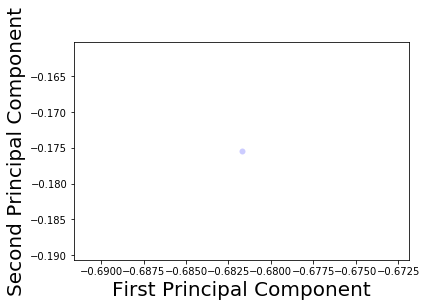

[0]	eval-error:0.06884	train-error:0.06885
[1]	eval-error:0.04641	train-error:0.04686
[2]	eval-error:0.02372	train-error:0.02356
[3]	eval-error:0.01834	train-error:0.01805
[4]	eval-error:0.01346	train-error:0.01296
[5]	eval-error:0.00940	train-error:0.00895
[6]	eval-error:0.00705	train-error:0.00659
[7]	eval-error:0.00571	train-error:0.00543
[8]	eval-error:0.00626	train-error:0.00638
[9]	eval-error:0.00384	train-error:0.00405
[10]	eval-error:0.00341	train-error:0.00323
[11]	eval-error:0.00237	train-error:0.00214
[12]	eval-error:0.00192	train-error:0.00154
[13]	eval-error:0.00245	train-error:0.00172
[14]	eval-error:0.00255	train-error:0.00177
[15]	eval-error:0.00255	train-error:0.00177
[16]	eval-error:0.00245	train-error:0.00178
[17]	eval-error:0.00243	train-error:0.00169
[18]	eval-error:0.00169	train-error:0.00130
[19]	eval-error:0.00169	train-error:0.00130
[20]	eval-error:0.00126	train-error:0.00096
[21]	eval-error:0.00098	train-error:0.00067
[22]	eval-error:0.00119	train-error:0.0009

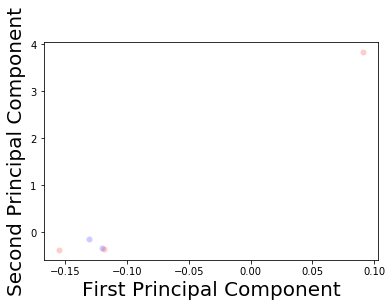

[0]	eval-error:0.06990	train-error:0.06850
[1]	eval-error:0.04646	train-error:0.04616
[2]	eval-error:0.02380	train-error:0.02286
[3]	eval-error:0.01905	train-error:0.01816
[4]	eval-error:0.01190	train-error:0.01176
[5]	eval-error:0.00945	train-error:0.00933
[6]	eval-error:0.00889	train-error:0.00876
[7]	eval-error:0.00624	train-error:0.00616
[8]	eval-error:0.00462	train-error:0.00441
[9]	eval-error:0.00280	train-error:0.00285
[10]	eval-error:0.00280	train-error:0.00279
[11]	eval-error:0.00265	train-error:0.00270
[12]	eval-error:0.00225	train-error:0.00244
[13]	eval-error:0.00306	train-error:0.00317
[14]	eval-error:0.00189	train-error:0.00207
[15]	eval-error:0.00129	train-error:0.00175
[16]	eval-error:0.00144	train-error:0.00178
[17]	eval-error:0.00096	train-error:0.00118
[18]	eval-error:0.00091	train-error:0.00097
[19]	eval-error:0.00101	train-error:0.00107
[20]	eval-error:0.00083	train-error:0.00082
[21]	eval-error:0.00066	train-error:0.00071
[22]	eval-error:0.00066	train-error:0.0006

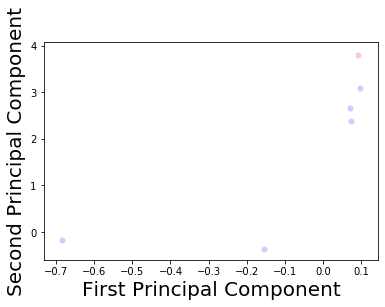

[0]	eval-error:0.06914	train-error:0.06875
[1]	eval-error:0.04568	train-error:0.04643
[2]	eval-error:0.02236	train-error:0.02333
[3]	eval-error:0.01905	train-error:0.01816
[4]	eval-error:0.01177	train-error:0.01181
[5]	eval-error:0.00829	train-error:0.00835
[6]	eval-error:0.00766	train-error:0.00772
[7]	eval-error:0.00889	train-error:0.00898
[8]	eval-error:0.00321	train-error:0.00302
[9]	eval-error:0.00316	train-error:0.00290
[10]	eval-error:0.00298	train-error:0.00268
[11]	eval-error:0.00205	train-error:0.00208
[12]	eval-error:0.00273	train-error:0.00254
[13]	eval-error:0.00184	train-error:0.00183
[14]	eval-error:0.00172	train-error:0.00158
[15]	eval-error:0.00162	train-error:0.00147
[16]	eval-error:0.00146	train-error:0.00118
[17]	eval-error:0.00088	train-error:0.00085
[18]	eval-error:0.00078	train-error:0.00075
[19]	eval-error:0.00083	train-error:0.00077
[20]	eval-error:0.00086	train-error:0.00077
[21]	eval-error:0.00091	train-error:0.00077
[22]	eval-error:0.00063	train-error:0.0004

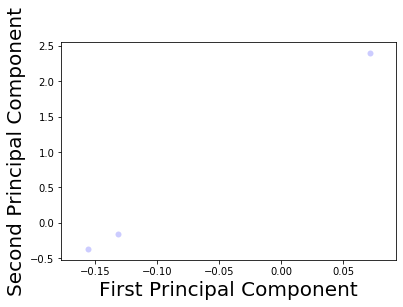

[0]	eval-error:0.06697	train-error:0.06947
[1]	eval-error:0.04555	train-error:0.04715
[2]	eval-error:0.02354	train-error:0.02362
[3]	eval-error:0.01824	train-error:0.01808
[4]	eval-error:0.01346	train-error:0.01291
[5]	eval-error:0.01033	train-error:0.00953
[6]	eval-error:0.00818	train-error:0.00757
[7]	eval-error:0.00510	train-error:0.00482
[8]	eval-error:0.00427	train-error:0.00445
[9]	eval-error:0.00308	train-error:0.00308
[10]	eval-error:0.00333	train-error:0.00339
[11]	eval-error:0.00328	train-error:0.00296
[12]	eval-error:0.00187	train-error:0.00176
[13]	eval-error:0.00253	train-error:0.00250
[14]	eval-error:0.00225	train-error:0.00217
[15]	eval-error:0.00210	train-error:0.00195
[16]	eval-error:0.00172	train-error:0.00162
[17]	eval-error:0.00129	train-error:0.00124
[18]	eval-error:0.00114	train-error:0.00126
[19]	eval-error:0.00091	train-error:0.00102
[20]	eval-error:0.00111	train-error:0.00117
[21]	eval-error:0.00051	train-error:0.00068
[22]	eval-error:0.00038	train-error:0.0005

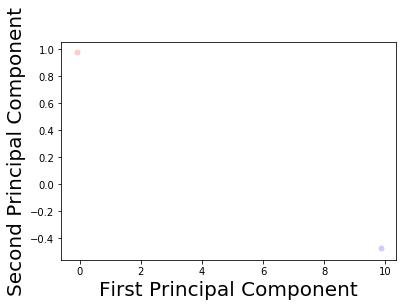

In [52]:
for i in range(10, 300, 50):
    xgb_train(i)

In [53]:
xgb_1.save_model('xgb.model')

In [61]:
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('xgb_classifier.model')

print(xgb_model.evals_result)

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)>


# 4-dimension


[0]	eval-error:0.06869	train-error:0.06890
[1]	eval-error:0.04012	train-error:0.04029
[2]	eval-error:0.01670	train-error:0.01724
[3]	eval-error:0.01266	train-error:0.01256
[4]	eval-error:0.01253	train-error:0.01235
[5]	eval-error:0.01276	train-error:0.01256
[6]	eval-error:0.01273	train-error:0.01256
[7]	eval-error:0.01036	train-error:0.01013
[8]	eval-error:0.00965	train-error:0.00954
[9]	eval-error:0.01190	train-error:0.01224
[10]	eval-error:0.01000	train-error:0.00991
[11]	eval-error:0.00894	train-error:0.00900
[12]	eval-error:0.00773	train-error:0.00788
[13]	eval-error:0.00654	train-error:0.00690
[14]	eval-error:0.00776	train-error:0.00808
[15]	eval-error:0.00611	train-error:0.00644
[16]	eval-error:0.00528	train-error:0.00564
[17]	eval-error:0.00634	train-error:0.00647
[18]	eval-error:0.00505	train-error:0.00537
[19]	eval-error:0.00520	train-error:0.00526
[20]	eval-error:0.00467	train-error:0.00435
[21]	eval-error:0.00483	train-error:0.00453
[22]	eval-error:0.00483	train-error:0.0045

[185]	eval-error:0.00200	train-error:0.00158
[186]	eval-error:0.00200	train-error:0.00158
[187]	eval-error:0.00200	train-error:0.00158
[188]	eval-error:0.00200	train-error:0.00158
[189]	eval-error:0.00200	train-error:0.00158
[190]	eval-error:0.00200	train-error:0.00158
[191]	eval-error:0.00197	train-error:0.00155
[192]	eval-error:0.00200	train-error:0.00158
[193]	eval-error:0.00197	train-error:0.00156
[194]	eval-error:0.00197	train-error:0.00155
[195]	eval-error:0.00202	train-error:0.00156
[196]	eval-error:0.00197	train-error:0.00156
[197]	eval-error:0.00197	train-error:0.00156
[198]	eval-error:0.00197	train-error:0.00155
[199]	eval-error:0.00197	train-error:0.00154


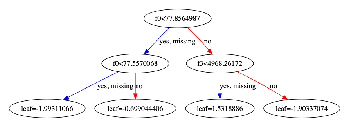

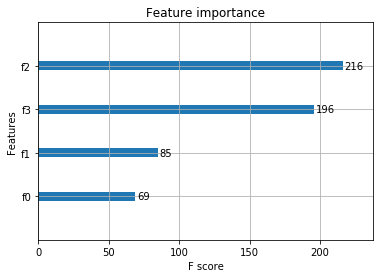

Training complete in 9.13s
Confusion matrix: 
 [[25661    21]
 [   57 13845]]
Acc: 99.803, Precision: 99.849 Recall: 99.590


In [68]:
select_col = [38, 39, 43, 44]

dataset = np.load('satellite_state.npy')
X = dataset[:, :-1]
y = dataset[-1]
x_train, x_test, y_train, y_test = train_test_split(
    dataset[:, :-1], dataset[:, -1], random_state=1)
x_train = x_train[:, select_col]
x_test = x_test[:, select_col]

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

evallist = [(dtest, 'eval'), (dtrain, 'train')]

since = time.time()
num_round = 200

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
xgb_model = xgb.train(param, dtrain, num_round, evallist)
#xgb_model.fit(x_train, y_train)

xgb.plot_tree(xgb_model, num_trees=0)
xgb.plot_importance(xgb_model)
plt.show()

time_elapsed = time.time() - since
print('Training complete in {:.2f}s'.format(time_elapsed))
predictions = xgb_model.predict(dtest)
predictions = np.array(predictions > 0.5)

cm_perf = (confusion_matrix(y_test, predictions))
print("Confusion matrix: \n", cm_perf)
perf = perf_parse(cm_perf)

In [70]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from test_xgboost import perf_parse
    
since = time.time()
# Standard preprocess the training data
scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

lr_model = LogisticRegression(max_iter=20000)
lr_model.fit(x_train_s, y_train)
time_elapsed = time.time() - since
print('Training complete in {:.2f}s'.format(time_elapsed))

predictions = lr_model.predict(x_train_s)
cm_perf = (confusion_matrix(y_train, predictions))
print("Confusion matrix: \n", cm_perf)
perf = perf_parse(cm_perf)

print("LR train score: {0:.3f}".format(lr_model.score(x_train_s, y_train)))
print("LR test score: {0:.3f}".format(lr_model.score(x_test_s, y_test)))

/Users/johnpaul/opt/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Training complete in 0.26s
Confusion matrix: 
 [[71906  5262]
 [ 5563 36018]]
Acc: 90.884, Precision: 87.253 Recall: 86.621
LR train score: 0.909
LR test score: 0.910


In [71]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from test_xgboost import perf_parse


since = time.time()
# Standard preprocess the training data
scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

svm_model = svm.SVC()
svm_model.fit(x_train_s, y_train)

time_elapsed = time.time() - since
print('Training complete in {:.2f}s'.format(time_elapsed))

predictions = svm_model.predict(x_train_s)
cm_perf = (confusion_matrix(y_train, predictions))
print("Confusion matrix: \n", cm_perf)
perf = perf_parse(cm_perf)

print("SVM train score: {0:.3f}".format(svm_model.score(x_train_s, y_train)))
print("SVM test score: {0:.3f}".format(svm_model.score(x_test_s, y_test)))

Training complete in 57.11s
Confusion matrix: 
 [[75416  1752]
 [  524 41057]]
Acc: 98.083, Precision: 95.907 Recall: 98.740
SVM train score: 0.981
SVM test score: 0.981


In [72]:

import numpy as np
import pandas as pd
import copy
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

# Accuracy
def get_accuracy(y_pred, y_target):
    n_correct = torch.eq(y_pred, y_target).sum().item()
    accuracy = n_correct / len(y_pred) * 100
    return accuracy

# Multilayer Perceptron
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], num_classes)

    def forward(self, x_in, apply_softmax=False):
        a_1 = F.relu(self.fc1(x_in))
        a_2 = F.relu(self.fc2(a_1))
        y_pred = self.fc3(a_2)
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim=1)

        return y_pred


# Standard preprocess the training data
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
score = 100

# Device configuration
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
# Model configuration
[m_train, n_train] = x_train.shape
input_size = n_train
hidden_size = [60, 30]
num_classes = 2
# Train configuration
num_epochs = 1000
learning_rate = 0.01
dropout_p = 0.5
step_size = 500

model = MLP(input_size=input_size,
            hidden_size=hidden_size,
            num_classes=num_classes)

model = model.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

# Optimization
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.5)

since = time.time()
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
# Training
for t in range(num_epochs):
    # Forward pass
    y_pred = model(x_train)

    # Accuracy
    _, predictions = y_pred.max(dim=1)
    accuracy = get_accuracy(y_pred=predictions.long(), y_target=y_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    if t % 10 == 0:
        _, pred_test = model(x_test, apply_softmax=True).max(dim=1)
        test_acc = get_accuracy(y_pred=pred_test, y_target=y_test)
        # deep copy the model
        if test_acc > best_acc:
            best_acc = test_acc
            best_model_wts = copy.deepcopy(model.state_dict())
        if t % 500 == 0:
            print("epoch: {0:4d} | loss: {1:.4f} | Train accuracy: {2:.1f}% | Test accuracy: {3:.1f}%"
                  .format(t, loss, accuracy, test_acc))

    # Zero all gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update weights
    optimizer.step()

    scheduler.step()

time_elapsed = time.time() - since
print('Training complete in {:.2f}s'.format(time_elapsed))
#print('Best val Acc: {:4f}'.format(best_acc))
model.load_state_dict(best_model_wts)

# Predictions
_, pred_train = model(x_train, apply_softmax=True).max(dim=1)
_, pred_test = model(x_test, apply_softmax=True).max(dim=1)

# Train and test accuracies
train_acc = get_accuracy(y_pred=pred_train, y_target=y_train)
test_acc = get_accuracy(y_pred=pred_test, y_target=y_test)
print("train acc: {0:.1f}%, test acc: {1:.1f}%".format(
    train_acc, test_acc))

y_true = y_test.cpu().numpy()
y_pred = pred_test.cpu().numpy()

cm_perf = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)
print(cm_perf)
acc = (cm_perf[1, 1] + cm_perf[0, 0]) / np.sum(cm_perf)
recall = cm_perf[1, 1] / (cm_perf[1, 0] + cm_perf[1, 1])
precision = cm_perf[1, 1] / (cm_perf[0, 1] + cm_perf[1, 1])
score = 2 / ((1 / recall) + (1 / precision))
model_perf = torch.tensor([acc, precision, recall, score])

epoch:    0 | loss: 0.6871 | Train accuracy: 56.3% | Test accuracy: 56.1%
epoch:  500 | loss: 0.0304 | Train accuracy: 99.3% | Test accuracy: 99.3%
Training complete in 172.40s
train acc: 99.4%, test acc: 99.4%
[[25512   170]
 [   58 13844]]
